In [1]:
import pandas as pd
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Users/rohansubramanian/Desktop/MSK/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## More Visualization

In [ ]:
df =  pd.read_csv('../results/gsea1_uvm_all.csv')
df.sort_values('pval', inplace=True)
df['num_gene'] = df['gene'].apply(lambda x: len(x.split(';')))

### Bar Plots for Top Up and Downregulated Genes

/var/folders/8v/2qv8nj450nzdjyyvwvl3vsr40000gn/T/ipykernel_14786/574018136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='nes', y='Term', data=df_vis, palette=colors)
/var/folders/8v/2qv8nj450nzdjyyvwvl3vsr40000gn/T/ipykernel_14786/574018136.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(x='nes', y='Term', data=df_vis, palette=colors)


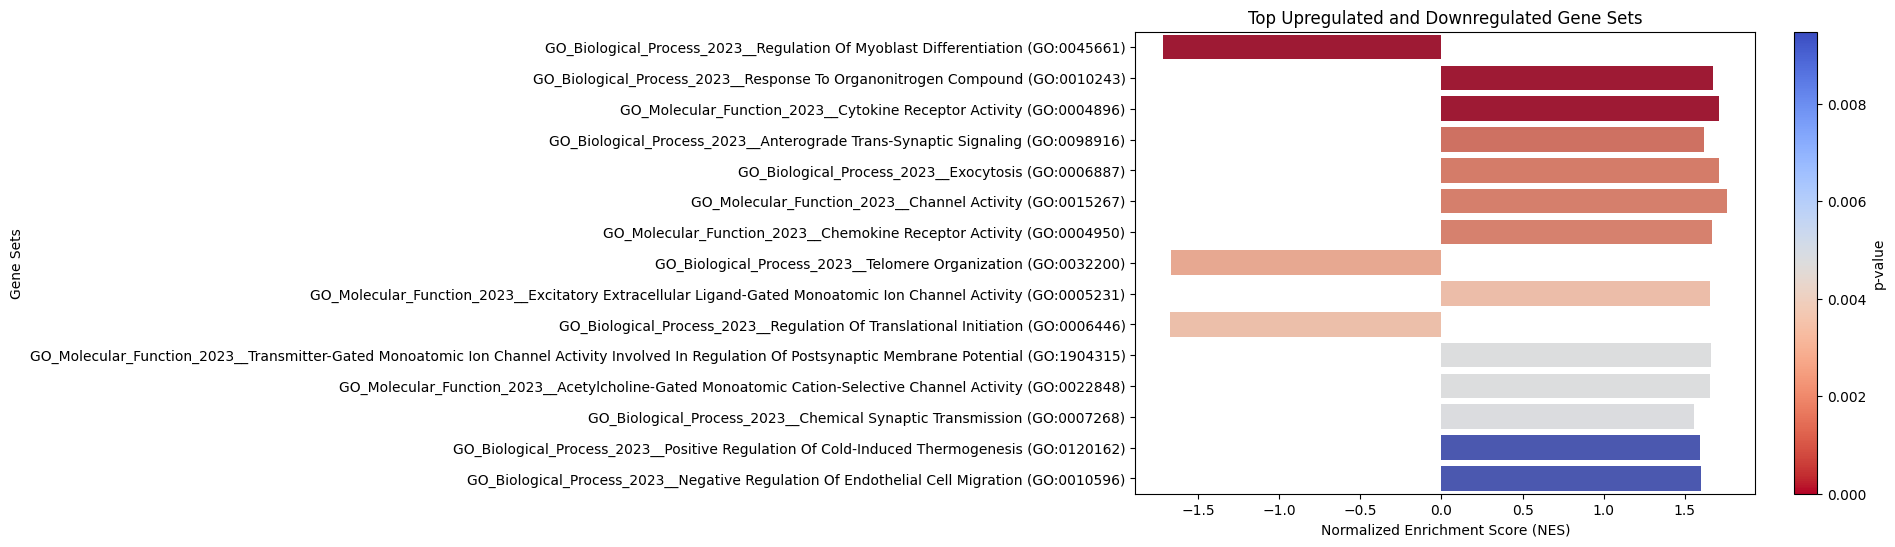

In [ ]:
df_vis = df[:15]

plt.figure(figsize=(10, 6))
norm = plt.Normalize(df_vis['pval'].min(), df_vis['pval'].max())
colors = plt.cm.coolwarm_r(norm(df_vis['pval']))
bars = sns.barplot(x='nes', y='Term', data=df_vis, palette=colors)
plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm_r', norm=norm), ax=bars, label='p-value')
plt.xlabel('Normalized Enrichment Score (NES)')
plt.ylabel('Gene Sets')
plt.title('Top Upregulated and Downregulated Gene Sets')
plt.show()

### Volcano Plots

/Users/rohansubramanian/Desktop/MSK/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


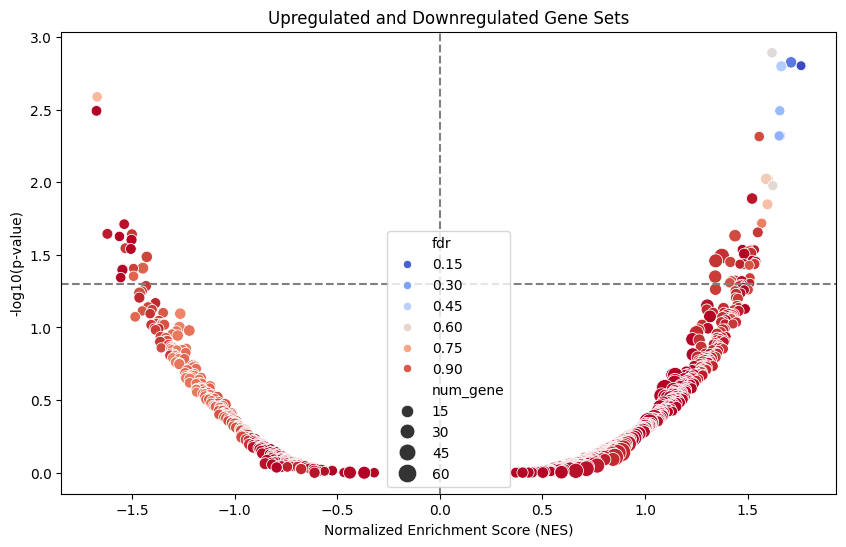

In [ ]:
# Add a column for the -log10(p-value)
df['-log10(pval)'] = -np.log10(df['pval'])

# Volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nes', y='-log10(pval)', hue='fdr', size='num_gene', sizes=(50, 200), data=df, palette='coolwarm')
plt.xlabel('Normalized Enrichment Score (NES)')
plt.ylabel('-log10(p-value)')
plt.title('Upregulated and Downregulated Gene Sets')
plt.axhline(y=-np.log10(0.05), color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

### Dot Plots

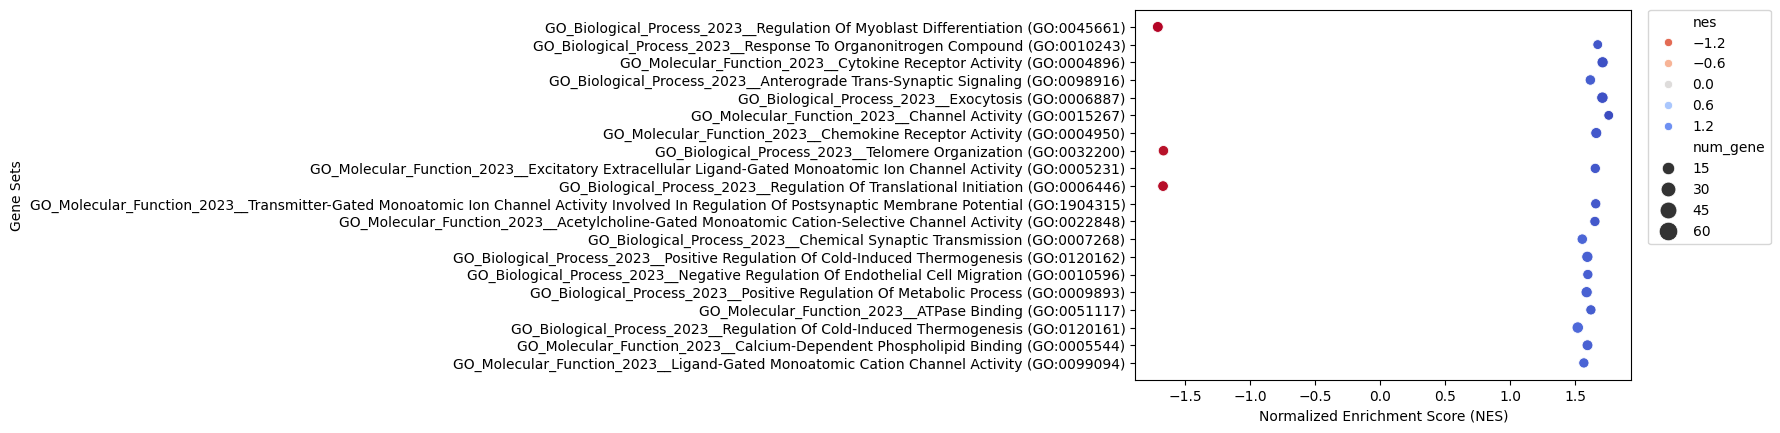

In [ ]:
df_vis = df[:20]
ax = sns.scatterplot(data=df_vis, x="nes", y="Term", hue="nes", size=df['num_gene'], palette='coolwarm_r', sizes=(50, 200))
ax.set_xlabel('Normalized Enrichment Score (NES)')
ax.set_ylabel('Gene Sets')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.02, 1.02))